# Explore here

In [18]:
# Handle imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, cross_val_score, StratifiedKFold, RandomizedSearchCV
import joblib
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

### Step 1.1: Load the data

In [3]:
# Load the data from the URL
data_df=pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')

### Step 1.2: Inspect the data

In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Step 1.3: Prepare the data

In [6]:
# Separate features from labels
labels=data_df['Outcome']
features=data_df.drop('Outcome', axis=1)

# Split the data into training and testing features and labels
training_features, testing_features, training_labels, testing_labels=train_test_split(
    features,
    labels,
    test_size=0.25,
    random_state=315
)

## 2: EDA

### 2.1: Inspect data distributions

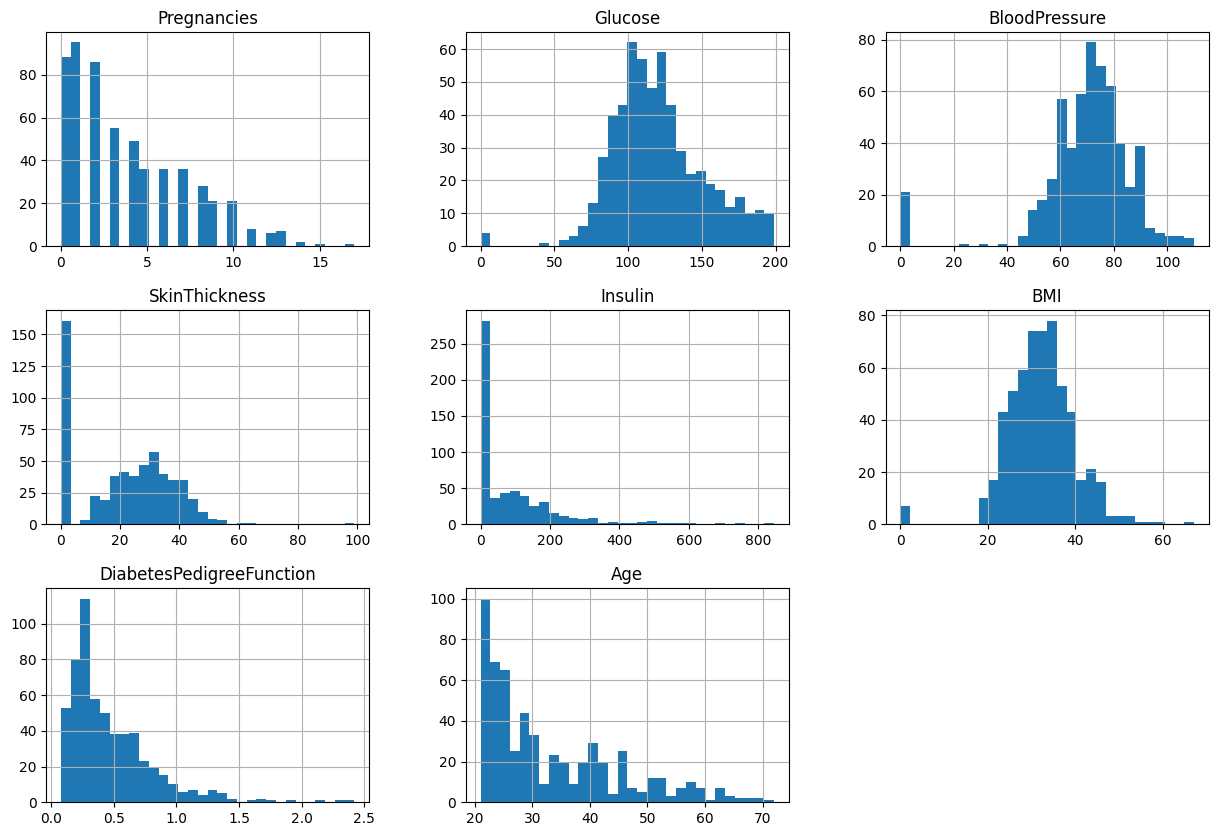

In [10]:
# Histogram for each feature
training_features.hist(bins=30, figsize=(15, 10))
plt.show()

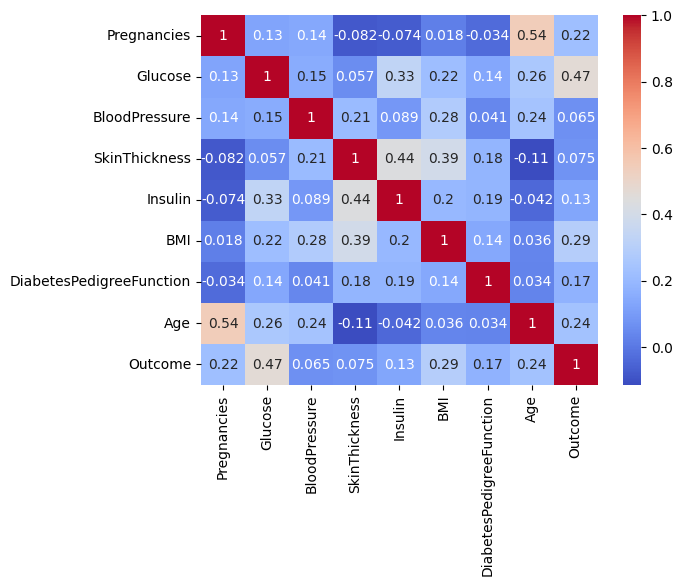

In [12]:
# Correlation matrix
corr = data_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [13]:
training_features.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,3.836806,120.604167,69.524306,21.338542,84.321181,32.215451,0.471531,33.168403
std,3.416752,31.320885,17.973587,16.136967,122.042114,7.759484,0.337386,11.745613
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,100.000000,64.000000,0.000000,0.000000,27.500000,0.238000,24.000000
50%,3.000000,117.000000,72.000000,24.000000,39.000000,32.400000,0.367000,29.000000
75%,6.000000,138.000000,80.000000,33.000000,130.000000,36.600000,0.626750,41.000000
max,17.000000,199.000000,110.000000,99.000000,846.000000,67.100000,2.420000,72.000000


### Step 2.2: Missing values

In [ ]:
# Define a reusable helper function for cross-validation here. We are going to
# be doing a lot of cross-validation, this allows us to reuse this code
# without having to copy-paste it over and over.

def cross_val(features: pd.DataFrame, labels: pd.Series) -> list[float]:
    '''Reusable helper function to run cross-validation on random forest 
    classifier with Scikit-learn defaults. Takes Pandas data frame of features
    and Pandas data series of labels. Returns list of cross-validation fold 
    accuracy scores as percents.'''

    # Instantiate a random forest classifier model
    model=GradientBoostingClassifier(random_state=315)

    # Define the cross-validation strategy
    cross_validation=StratifiedKFold(n_splits=7, shuffle=True, random_state=315)

    # Run the cross-validation, collecting the scores
    scores=cross_val_score(
        model,
        features,
        labels,
        cv=cross_validation,
        n_jobs=-1,
        scoring='accuracy'
    )

    # Print mean and standard deviation of the scores
    print(f'Cross-validation accuracy: {(scores.mean() * 100):.2f} +/- {(scores.std() * 100):.2f}%')

    # Return the scores
    return scores

scores=cross_val(training_features, training_labels)

In [16]:
# Check columns for 0 values
missing_data = (data_df == 0).sum()
missing_data

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [17]:
# Impute 0 values to the mean for desired columns
missing_data_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
simple_imputed_training_features=training_features.copy()

for target_feature in missing_data_features:
    impute_data=simple_imputed_training_features[simple_imputed_training_features[target_feature] != 0][target_feature]
    target_feature_imputed_value=impute_data.mean()
    imputed_data=simple_imputed_training_features[target_feature].replace({0:target_feature_imputed_value})
    simple_imputed_training_features[target_feature]=imputed_data
    print(f'{target_feature} imputed value: {target_feature_imputed_value:.1f}')
simple_imputed_training_features.describe()

Glucose imputed value: 121.4
BloodPressure imputed value: 72.2
SkinThickness imputed value: 29.6
Insulin imputed value: 161.9
BMI imputed value: 32.6


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,3.836806,121.447552,72.154955,29.616867,161.896667,32.611775,0.471531,33.168403
std,3.416752,29.649706,11.825299,9.134938,91.332606,6.886192,0.337386,11.745613
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,100.000000,64.000000,25.000000,120.000000,27.700000,0.238000,24.000000
50%,3.000000,118.000000,72.000000,29.616867,161.896667,32.400000,0.367000,29.000000
75%,6.000000,138.000000,80.000000,33.000000,161.896667,36.600000,0.626750,41.000000
max,17.000000,199.000000,110.000000,99.000000,846.000000,67.100000,2.420000,72.000000
